# Resolución de examen PEIA 2020 - Nicolás Eduardo Horro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.stats as stats
from scipy.stats import norm, binom,t
init_printing(use_unicode=True)

### Ejercicio 1

Una máquina que produce fósforos tiene una proporción de defecto aleatoria de 1%.

(a) Encontrar la máxima cantidad de fósforos, N , que se pueden ensamblar en una misma caja de
manera tal que la probabilidad de tener uno o más fósforos defectuosos sea menor a 0.5.

**Respuesta**:

Este problema se puede plantear como un experimento de Bernoulli. TODO: desarrollar.

$$
\mathit
P(X=x) = \frac{n!}{k!(n-k)!} p^k q^{n-k}
$$

dónde:

$$
x = 1 \text{ si Fósforo defectuoso (éxito).} \\
x = 0 \text{ si Fósforo no defecutoso (fracaso).} \\
$$

$$
n: \text{cantidad de ensayos = fósforos agregados a una caja hasta hallar uno defectuoso} \\
k: \text{cantidad de casos de éxito(fósforos no defectuosos agregados)} \\
p: \text{probabilidad de éxito(probabilidad de que un fósforo no sea defectuoso)} \\
q: \text{probabilidad de fracaso(fósforo defectuoso)} \\
$$


Si graficamos la CDF vemos que conforme aumenta la cantidad de intentos (fósforos agregados a una caja) aumenta también la probabilidad de que el fósforo agregado sea defectuoso.

Text(0, 0.5, 'Probabilidad de que la caja tenga al menos un fósforo defectuoso')

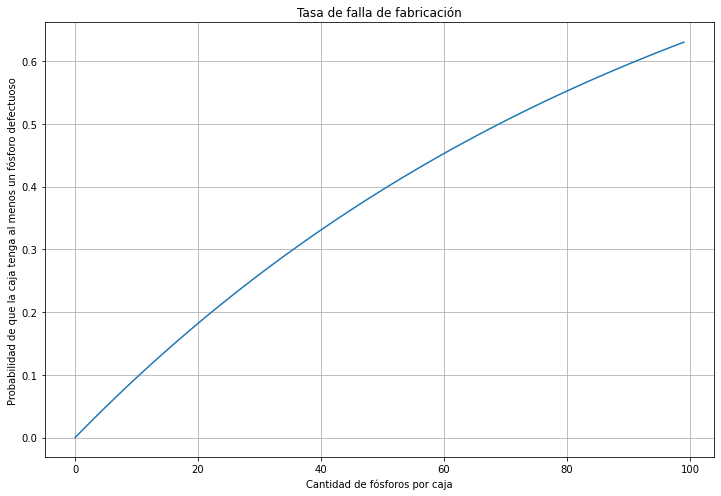

In [2]:
n = np.arange(100)
p = binom.cdf(k=n-1,n=n,p=0.99)
plt.figure(figsize=(12,8))
plt.plot(n,p)
plt.grid(which="Both")
plt.title("Tasa de falla de fabricación")
plt.xlabel("Cantidad de fósforos por caja")
plt.ylabel("Probabilidad de que la caja tenga al menos un fósforo defectuoso")

Se desea obtener el valor de $N$ para el cuál $P(X=1) = 0.5$, y se considerará este número como el máximo número de fósforos por caja permitidos para cumplir con la premisa.

(b) Encontrar el valor esperado y el desvı́o estándar de la cantidad de fósforos defectuosos para el N
calculado en el punto (a).

**Respuesta**:

In [3]:
N = 69 # TODO. Calcular bien

In [4]:
#E = p

In [5]:
#sigma2 = p*q

In [6]:
#std_dev = sqrt(sigma2)

(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b). Comparar con
los resultados teóricos esperados.

**Respuesta**:

In [7]:
def simulate_experiment1(n_iterations,n_samples,prob_defect):
    boxes_with_faulty_matches = 0
    for i in range(n_iterations):    
        samples = np.random.uniform(0,1,n_samples)
        faulty_matches = np.count_nonzero(samples > (1.0-prob_defect))    
        
        # Fósforos defectuosos en la caja
        if faulty_matches > 0:
            boxes_with_faulty_matches += 1
    return (boxes_with_faulty_matches/n_iterations)

In [8]:
n_iterations = 10000  # Cantidad de iteraciones por cada N ensayado
n_trials = 100       # Número máximo de ensayos=cantidad máxima de fósforos probada
prob_defect = 0.01   # Probabilidad de que un fósforo sea defectuoso

x = np.arange(n_trials)
y = np.zeros(n_trials)
for i in range(n_trials):
     y[i] = simulate_experiment1(n_iterations,i,prob_defect)
        
q_above_accepted_failure = np.argmax(y > 0.5)
q_above_accepted_failure

70

El $N$ encontrado por simulación es ~69.

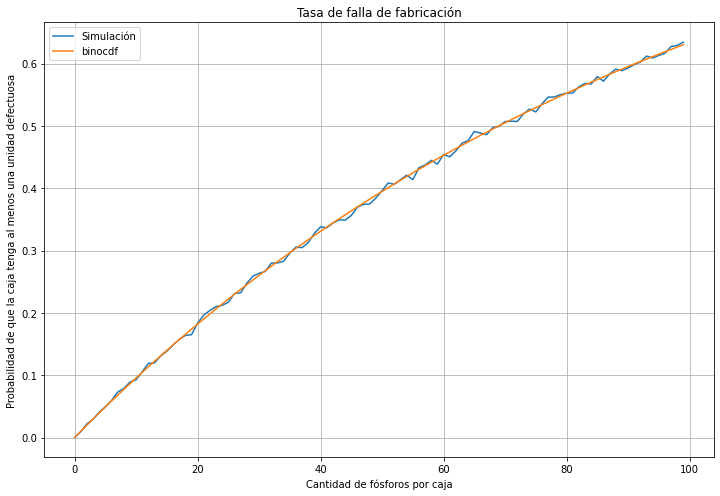

In [9]:
plt.figure(figsize=(12,8))
plt.plot(x,y)   
plt.plot(x,binom.cdf(k=x-1,n=x,p=1-0.01))
plt.grid(which="Both")
plt.title("Tasa de falla de fabricación")
plt.xlabel("Cantidad de fósforos por caja")
plt.ylabel("Probabilidad de que la caja tenga al menos una unidad defectuosa")
plt.legend(["Simulación","binocdf"])

### Ejercicio 2

Sea $X$ una variable aleatoria con función de densidad de probabilidad (pdf) $f_X(x) = kx$, si $0 \le x \le 3$, y $f_X(x) = 0$ si no.

(a) Encontrar el valor de k.

**Respuesta**:

Como $f_X(x) = 0$ fuera del intervalo $[0,3]$ sólo se estudiará este intervalo.

Interesa hallar el valor de $k$ para el cuál la CDF evaluada en 3 es 1. Por lo tanto:

$$
\int_0^3{kx}dx = \int_0^3{x}dx = \left.\frac{k}{2}x^2\right|_{3} - \left.\frac{k}{2}x^2\right|_{0} = \frac{9k}{2}
$$

$$
\frac{9k}{2} = 1 \therefore k = \frac{2}{9}
$$

(b) Encontrar $x_1$ tal que $P(X \le x_1 ) = 0.1$.

**Respuesta**:

$$
P(X \le x_1 ) = \int_0^{x_1}{\frac{2}{9}x}dx = \frac{x_1^2}{9} 
$$

$$
\frac{x_1^2}{9} = 0.1 \therefore x_1 = \sqrt{0.9}
$$

(c) Simular la variable aleatoria $X$ usando el método de la transformada inversa.

**Respuesta**:

Dado que $F_X^{-1}$ existe, se puede plantear:

$$
U = F_X(x) = \frac{x^2}{9}
$$

Entonces:

$$
X = \sqrt{9U}
$$

In [10]:
def inverse_transform_rv(n_samples):
    U = np.random.uniform(0,1,n_samples)
    X = np.sqrt(9*U)
    return X

(d) A partir de la variable $X$ generada, estimar -mediante simulaciones- la pdf de $X$ usando método
de densidad de kernel con función de kernel Gaussiana.

**Respuesta**:

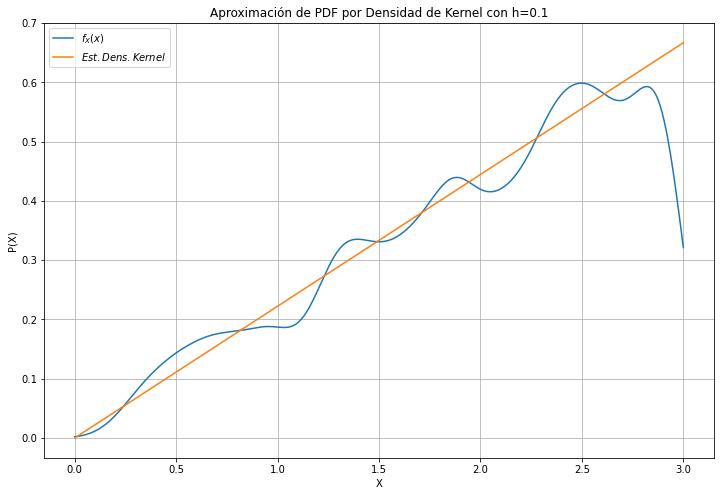

In [11]:
n_iterations = 1000  # Número de simulaciones
n_samples = 1000 # Simulaciones de la variable independiente

X = inverse_transform_rv(n_iterations)
x = np.linspace(0,3,n_samples)

# Constante de filtrado y dispersión de la Gaussiana
h = 0.1
p = np.zeros(x.shape)

for i in range(n_iterations):
    for j in range(x.shape[0]):
        K = ( 1 / np.sqrt(2*np.pi) ) * np.exp( -(1/2)*((X[i]-x[j] ) / h )**2 )
        p[j] = p[j] + (1/(n_iterations*h))*K
        
plt.figure(figsize=(12,8))
plt.title("Aproximación de PDF por Densidad de Kernel con h=0.1")
plt.plot(x,p)   
plt.plot(x,(2/9)*x)
plt.grid(which="Both")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.legend(["$f_X(x)$","$Est. Dens. Kernel$",])

In [12]:
x = symbols("x")
mu = integrate(x*Rational(2,9)*x,(x,0,3))
sigma2 = integrate((x**2)*Rational(2,9)*x,(x,0,3)) - mu**2
mu_hat = X.mean()
sigma2_hat = X.var()
print("Media teórica:", mu)
print("Varianza teóríca:", sigma2)
print("Media muestral:", mu_hat)
print("Varianza muestral:", sigma2_hat)

Media teórica: 2
Varianza teóríca: 1/2
Media muestral: 1.9939491160560396
Varianza muestral: 0.5069559929709875


### Ejercicio 3

Sea $X_1, X_2,...,X_{10}$ una muestra aleatoria de una población con distribución normal con media $\mu$ y
desvı́o estándar 4. Sea $\hat{X}$ la media muestral. Se mide $\hat{X}$ = 48. Se tiene la hipótesis nula $H_0: \mu = 45$, y la hipótesis alternativa $H_1: \mu \neq 45$.

(a) Encontrar un intervalo de confianza del 95 % de $\mu$.

**Respuesta**:

In [13]:
N = 10
std_dev = 4  # Desvío estandard característico (dato).
mu_hat = 48 # Media muestral (dato)

In [14]:
alpha = (1- 0.95) 
z_norm = norm.ppf(1-alpha/2)
z_student = t.ppf(1-alpha/2,df=10)

In [15]:
z_norm

In [16]:
z_student

   
El intervalo de confianza del 95% (Normal) es:

In [17]:
z = z_norm
mu_min_teorico = mu_hat-(z*std_dev/np.sqrt(N))
mu_max_teorico = mu_hat+(z*std_dev/np.sqrt(N))
(mu_min_teorico,mu_max_teorico)

El intervalo de confianza del 95% (Student) es:

In [18]:
z = z_student
mu_min_teorico = mu_hat-(z*std_dev/np.sqrt(N))
mu_max_teorico = mu_hat+(z*std_dev/np.sqrt(N))
(mu_min_teorico,mu_max_teorico)

Nota: Cómo el número de muestras es bajo (N<30) se utilizará la distribución de Student.

(b) Justificar si hay suficiente evidencia para rechazar la hipótesis nula con un 5% de significancia.

**Respuesta**:
    
Dado que la hipótesis $\mu=45$ está fuera del intervalo de confianza la misma se rechaza.

(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b).

**Respuesta**:
    
El valor de confianza encontrado por simulación (~0.974) es cercano al 95% esperado.

Nota: la simulación se hace con distribución normal.

In [19]:
def simulate_htest(pop_mean, pop_stddev,n_iterations = 10000):
    print(f"Simulación para media: {pop_mean} std_dev: {pop_stddev}")
    
    # Confianza inicial en que la hipótesis alternativa es falsa
    confidence = 0
    sample_mean = 0
    sample_var = 0
    sample_stdev = 0    
    for i in range(n_iterations):        
        X = pop_stddev/np.sqrt(N)*np.random.normal(size=N) + pop_mean;        
        confidence = confidence + (1/(n_iterations*N)) * np.count_nonzero( 
            (X >= mu_min_teorico) & (X <= mu_max_teorico) )            
        sample_mean = sample_mean + X.mean()
        sample_var = sample_var + X.var()
        sample_stdev = sample_stdev + X.std()
    sample_mean = sample_mean / n_iterations
    sample_var = sample_var / n_iterations
    sample_stdev = sample_stdev / n_iterations

    print("Confianza: ", confidence)
    print("Media muestral: ", sample_mean)
    print("Varianza muestral: ", sample_var)
    print("Desvío estándard muestral: ", sample_stdev)

In [24]:
simulate_htest(pop_mean=48.0,pop_stddev=4.0)

Simulación para media: 48.0 std_dev: 4.0
Confianza:  0.9739299999999516
Media muestral:  48.00526718572259
Varianza muestral:  1.4412879057908148
Desvío estándard muestral:  1.167525637877752
